# Plots for validated Data 

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
from collections import OrderedDict
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d,griddata
from scipy.interpolate import interp1d,LinearNDInterpolator,NearestNDInterpolator
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
#sns.set_context('paper', font_scale=1.8) "font.family": "sans-serif","font.sans-serif": ["Helvetica"],
sns.set(style="white", context="paper", font_scale=1.8, 
        rc={"text.usetex": True, 
            'font.family':'Times New Roman', 
            'font.serif':'Times New Roman', 
            "savefig.dpi": 300})
plt.rcParams['text.usetex'] = True

#sns.set_context('paper', font_scale=1.8) "font.family": "sans-serif","font.sans-serif": ["Helvetica"],
sns.set(style="white", context="paper", font_scale=1.8, 
        rc={"text.usetex": True, 
            'font.family':'Times New Roman', 
            'font.serif':'Times New Roman', 
            "savefig.dpi": 300})
plt.rcParams['text.usetex'] = True
def configure_axes(ax, info=None):   
    if info is not None:
        multiline_info = "\n".join(info)
        ax.text(0.2, 0.5, multiline_info, transform=ax.transAxes, fontsize=16,
                color='black', bbox=dict(facecolor='silver', alpha=0.5,
                                         edgecolor='silver', boxstyle='round,pad=0.8',
                                         linewidth=0.2))
    def set_x_label(label, size=18, labelpad=5):
        ax.set_xlabel(label, size=size, labelpad=labelpad, loc="right", fontname='serif')
    def set_y_label(label, size=18, labelpad=5):
        ax.set_ylabel(label, size=size, labelpad=labelpad, loc="top", fontname='serif')
    def set_legend(framealpha=0.5, fontsize='16'):
        ax.legend(framealpha=framealpha, loc='best', fontsize=fontsize)
    ax.set_x_label = set_x_label
    ax.set_y_label = set_y_label
    ax.minorticks_on() 
    ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
    ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_linewidth(1.2)
    sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
    ax.tick_params(axis='x', labelcolor='black', labelsize=16)
    ax.tick_params(axis='y', labelcolor='black', labelsize=16)

cm = plt.colormaps['RdYlBu']


/tmp/ipykernel_12027/2149704662.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import glob,imp,os,shutil
/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
dataDF = pd.read_csv('TRV1jj_broad.csv')
print(dataDF.columns.values.tolist()) 


['Unnamed: 0', 'filename', 'mass.55', 'mass.5000001', 'mass.9000002', 'mass.9000003', 'mass.9000004', 'width.55', 'width.5000001', 'width.9000002', 'width.9000003', 'width.9000004', 'extpar.1', 'extpar.2', 'extpar.3', 'extpar.4', 'extpar.5', 'extpar.6', 'extpar.7', 'extpar.8', 'extpar.9', 'extpar.10', 'extpar.11', 'extpar.12', 'extpar.13', 'extpar.14', 'extpar.15', 'extpar.16', 'xsec13TeV(fb).55', 'BRs.y1.b,b', 'BRs.y1.c,c', 'BRs.y1.q,q', 'BRs.y1.t-,t+', 'BRs.y1.xd~,xd', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)', 'SMS Decomposition', 'Total xsec for missing topologies (fb)', 'Total xsec for missing topologies with displaced decays (fb)', 'Total xsec for missing topologies with prompt decays (fb)', 'Total xsec for topologies outside the grid (fb)', 'OutputStatus.sigmacut', 'OutputStatus.minmassgap', 'OutputStatus.maxcond', 'OutputStatus.ncpus', 'OutputStatus.model', 'OutputStatus.promptwidth', 'OutputStatus.stablewidth', 'OutputStatus.eraseprompt', 'OutputStatus.checkinput', 'OutputStat

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)
pd.set_option('display.float_format', '{:e}'.format)
dataDF


,Unnamed: 0,filename,mass.55,mass.5000001,mass.9000002,mass.9000003,mass.9000004,width.55,width.5000001,width.9000002,width.9000003,width.9000004,extpar.1,extpar.2,extpar.3,extpar.4,extpar.5,extpar.6,extpar.7,extpar.8,extpar.9,extpar.10,extpar.11,extpar.12,extpar.13,extpar.14,extpar.15,extpar.16,xsec13TeV(fb).55,"BRs.y1.b,b","BRs.y1.c,c","BRs.y1.q,q","BRs.y1.t-,t+","BRs.y1.xd~,xd",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,0,run_449_mzp_4700_gvq_0.63.slha,4.700000e+03,0.000000e+00,9.118760e+01,7.982436e+01,7.982436e+01,1.026409e+03,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.339000e-01,6.339000e-01,6.339000e-01,6.339000e-01,6.339000e-01,6.339000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.013700e+01,1.464230e-01,1.464230e-01,1.464230e-01,1.464214e-01,1.214637e-01,1.013700e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",2.715551e+00,0.000000e+00,1.013700e+01,0.000000e+00,0.000000e+00,5,2.000000e-01,1,TRV1jj_slha_broad/run_01_mzp_1800_gvq_0.13.slha,5.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha_broad/run_449_mzp_4700_gvq_0.63.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,7.421450e+00,1.458480e+01,NaN,['TRV1jj'],"[('y1', 4700.0)]",CMS-EXO-19-012,NaN,1.300000e+01,1.370000e+02,upperLimit,5.088482e-01,NaN,"[('y1', 1026.4)]"
1,1,run_333_mzp_4000_gvq_0.19.slha,4.000000e+03,0.000000e+00,9.118760e+01,7.982436e+01,7.982436e+01,1.770224e+02,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.927000e-01,1.927000e-01,1.927000e-01,1.927000e-01,1.927000e-01,1.927000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.228500e+00,6.677060e-02,6.677060e-02,6.677060e-02,6.676923e-02,5.993778e-01,4.228500e+00,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",2.816803e+00,0.000000e+00,4.228500e+00,0.000000e+00,0.000000e+00,5,2.000000e-01,1,TRV1jj_slha_broad/run_01_mzp_1800_gvq_0.13.slha,5.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1jj_slha_broad/run_333_mzp_4000_gvq_0.19.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,1.411697e+00,1.838170e+01,NaN,['TRV1jj'],"[('y1', 4000.0)]",CMS-EXO-19-012,NaN,1.300000e+01,1.370000e+02,upperLimit,7.679907e-02,NaN,"[('y1', 177.02)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,643,run_454_mzp_4800_gvq_0.22.slha,4.800000e+03,0.000000e+00,9.118760e+01,7

In [4]:
# Assign -1 to NaN values in the 'r' column
dataDF['ExptRes.result0.r'].fillna(value=-1, inplace=True)
# data without results (r < 0)
data_no_results = dataDF[dataDF['ExptRes.result0.r'] < 0]
data_no_results


/tmp/ipykernel_12027/1614190006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataDF['ExptRes.result0.r'].fillna(value=-1, inplace=True)


,Unnamed: 0,filename,mass.55,mass.5000001,mass.9000002,mass.9000003,mass.9000004,width.55,width.5000001,width.9000002,width.9000003,width.9000004,extpar.1,extpar.2,extpar.3,extpar.4,extpar.5,extpar.6,extpar.7,extpar.8,extpar.9,extpar.10,extpar.11,extpar.12,extpar.13,extpar.14,extpar.15,extpar.16,xsec13TeV(fb).55,"BRs.y1.b,b","BRs.y1.c,c","BRs.y1.q,q","BRs.y1.t-,t+","BRs.y1.xd~,xd",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
25,25,run_15_mzp_1800_gvq_0.94.slha,1.800000e+03,0.000000e+00,9.118760e+01,7.982436e+01,7.982436e+01,8.081958e+02,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.406900e-01,9.406900e-01,9.406900e-01,9.406900e-01,9.406900e-01,9.406900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.789300e+04,1.568336e-01,1.568336e-01,1.568336e-01,1.567542e-01,5.907786e-02,1.789300e+04,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",3.861883e+03,0.000000e+00,1.789300e+04,1.403112e+04,0.000000e+00,5,2.000000e-01,1,TRV1jj_slha_broad/run_01_mzp_1800_gvq_0.13.slha,5.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,0,Input file ok,TRV1jj_slha_broad/run_15_mzp_1800_gvq_0.94.slha,3.0.0-beta,3.0.0-beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,NaN
109,109,run_14_mzp_1800_gvq_0.63.slha,1.800000e+03,0.000000e+00,9.118760e+01,7.982436e+01,7.982436e+01,3.930641e+02,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.339000e-01,6.339000e-01,6.339000e-01,6.339000e-01,6.339000e-01,6.339000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.136900e+03,1.464336e-01,1.464336e-01,1.464336e-01,1.463594e-01,1.214725e-01,8.136900e+03,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",2.179321e+03,0.000000e+00,8.136899e+03,5.957578e+03,0.000000e+00,5,2.000000e-01,1,TRV1jj_slha_broad/run_01_mzp_1800_gvq_0.13.slha,5.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,0,Input file ok,TRV1jj_slha_broad/run_14_mzp_1800_gvq_0.63.slha,3.0.0-beta,3.0.0-beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,NaN
267,267,run_45_mzp_2000_gvq_0.94.slha,2.000000e+03,0.000000e+00,9.118760e+01,7.982436e+01,7.982436e+01,8.980200e+02,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.406900e-01,9.406900e-01,9.406900e-01,9.406900e-01,9.406900e-01,9.406900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.036800e+04,1.568293e-01,1.568293e-01,1.568293e-01,1.567773e-01,5.907624e-02,1.036800e+04,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",2.237970e+03,0.000000e+00,1.036800e+04,8.130031e+03,0.0

#### Set r = 0 for points with no results 

In [5]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [6]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [7]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 645
Total excluded (LHC) = 197
Total allowed = 448



### Create analysis label for excluded points

In [8]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


/tmp/ipykernel_12027/3923628249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excluded['label'] = labels


In [9]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(197, 79)


In [10]:
data_exp = pd.read_csv('/home/yoxara/smodels-database/13TeV/CMS/CMS-EXO-19-012/orig/Couplinglimits_DMmediator_Expected.csv', skiprows=14)
data_obs = pd.read_csv('/home/yoxara/smodels-database/13TeV/CMS/CMS-EXO-19-012/orig/Couplinglimits_DMmediator_Observed.csv', skiprows=7)
MZp_Obs = data_obs.iloc[:, 0]
MZp_Exp = data_exp.iloc[:, 0]
gq_Obs = data_obs.iloc[:, 1]
gq_Exp = data_exp.iloc[:, 1]
#pd.set_option('display.max_rows', None)
print(gq_Obs.values)
print(gq_Exp.values)
print(MZp_Obs.values)
print(MZp_Exp.values)


[0.17744 0.20426 0.20895 0.20524 0.1659  0.13295 0.14614 0.1927  0.22156
 0.24627 0.26604 0.28235 0.30522 0.30275 0.28507 0.26851 0.28902 0.3144
 0.35165 0.404   0.42748 0.4478  0.46606 0.4861  0.4515  0.45562 0.50188
 0.58749 0.6339  0.90973 0.94069]
[0.16467 0.17414 0.17867 0.18073 0.18238 0.18651 0.19475 0.20229 0.20623
 0.21241 0.2186  0.22575 0.23614 0.24281 0.24948 0.25887 0.27568 0.29149
 0.30504 0.3197  0.33576 0.35889 0.40153 0.41388 0.43695 0.46537 0.50885
 0.55513 0.60899 0.62981 0.6626  0.72518 0.87035 1.0187 ]
[1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900.
 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000. 4100.
 4200. 4300. 4400. 4500. 4600. 4700. 4800.]
[1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900.
 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000. 4100.
 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900. 5000. 5100.]


In [11]:
import numpy as np
(((18*(0.1927)**2) + 1)*1800) /(12*np.pi)


79.66019487409876

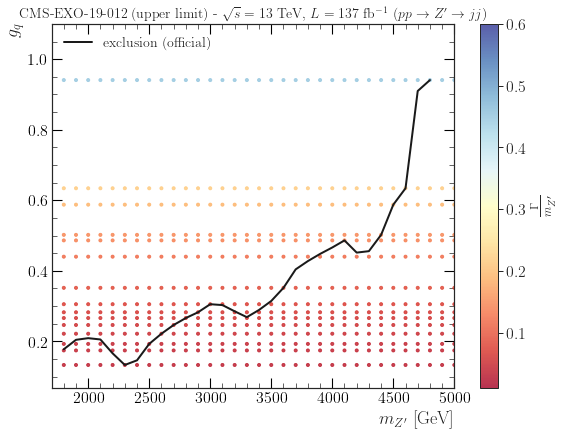

In [12]:
#dataDF = dataDF[dataDF['extpar.4'] < 1.2].reset_index(drop=True)
fig, ax = plt.subplots(figsize=(8,6))
configure_axes(ax)
x = dataDF['mass.55']
y = dataDF['extpar.4']
c = c = dataDF['width.55'] / dataDF['mass.55']
x = x[c.argsort()]
y = y[c.argsort()]
c = c[c.argsort()]
sc = ax.scatter(x,y,c=c,s=10,cmap=cm, vmin=0.01, vmax=0.6,alpha=0.8) #vmin=0.01, vmax=0.6,
observed_line, = plt.plot(MZp_Obs, gq_Obs, 'k', linewidth=2, label='exclusion (official)')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2, linestyle='solid', label='SModelS Observed')
ax.legend(handles=[observed_line,], loc='upper left', framealpha=0.0, fontsize=14,ncol=2)
plt.colorbar(sc, label=r'$\frac{\Gamma}{m_{Z^{\prime}}}$')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$g_{q}$')
plt.xlim(1700, 5000)
plt.ylim(0.067, 1.1)
plt.tight_layout()
plt.title(r'CMS-EXO-19-012 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 137$ fb$^{-1}$  ($ p p \to Z^{\prime} \to j j$)', fontsize=14)
#plt.text(4400, 1.42, r'($j = u,d,c,s,b$)', horizontalalignment='center', verticalalignment='center', fontsize=14) plt.text('k factor = 1.2')
plt.show()


In [13]:
#sigma*BR UPPER LIMITS
dataDF2 = pd.read_csv('/home/yoxara/smodels-database/13TeV/CMS/CMS-EXO-19-012/orig/sigmaxBR_combined_data.csv')
MZp = dataDF2['MZp [GeV]']
sigmaxBR_1p = dataDF2['sigmaxBR_1p']
sigmaxBR_5p = dataDF2['sigmaxBR_5p']
sigmaxBR_10p = dataDF2['sigmaxBR_10p']
sigmaxBR_15p = dataDF2['sigmaxBR_15p']
sigmaxBR_20p = dataDF2['sigmaxBR_20p']
sigmaxBR_30p = dataDF2['sigmaxBR_30p']
sigmaxBR_40p = dataDF2['sigmaxBR_40p']
sigmaxBR_55p = dataDF2['sigmaxBR_55p']
sigmaxBR_40p.head(6)   


0            NaN
1            NaN
        ...     
4   5.404324e-01
5   3.987605e-01
Name: sigmaxBR_40p, Length: 6, dtype: float64

In [14]:
#xsec: pb to fb 
sigmaxBR_1p_fb = [x * 1000 for x in sigmaxBR_1p]
sigmaxBR_5p_fb = [x * 1000 for x in sigmaxBR_5p]
sigmaxBR_10p_fb = [x * 1000 for x in sigmaxBR_10p]
sigmaxBR_15p_fb = [x * 1000 for x in sigmaxBR_15p]
sigmaxBR_20p_fb = [x * 1000 for x in sigmaxBR_20p]
sigmaxBR_30p_fb = [x * 1000 for x in sigmaxBR_30p]
sigmaxBR_40p_fb = [x * 1000 for x in sigmaxBR_40p]
sigmaxBR_55p_fb = [x * 1000 for x in sigmaxBR_55p]


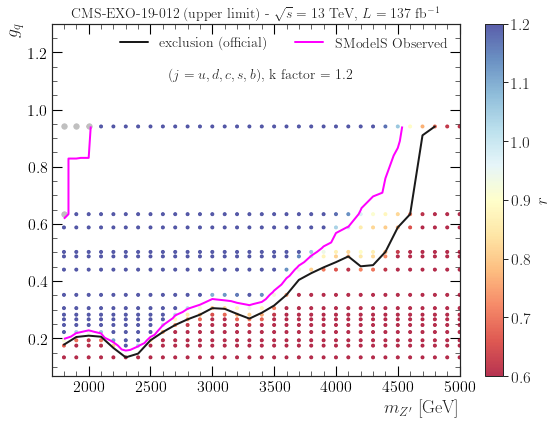

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
configure_axes(ax)

mask = dataDF['ExptRes.result0.r'].notna()
x_valid = dataDF.loc[mask, 'mass.55']
y_valid = dataDF.loc[mask, 'extpar.4']
c_valid = dataDF.loc[mask, 'ExptRes.result0.r']*1.2

# Ordenar los datos válidos basados en 'c'.
order = c_valid.argsort()
x_valid_sorted = x_valid.iloc[order]
y_valid_sorted = y_valid.iloc[order]
c_valid_sorted = c_valid.iloc[order]

# Verificar la cantidad de puntos válidos para tricontour.
if len(x_valid_sorted) >= 3:
    # Crear una figura de dispersión con los datos válidos.
    sc = plt.scatter(x_valid_sorted, y_valid_sorted, c=c_valid_sorted, s=10, cmap=cm, vmin=0.6, vmax=1.2, alpha=0.8)
    # Crear la trama de contorno solo con los datos válidos.
    cs = plt.tricontour(x_valid_sorted, y_valid_sorted, c_valid_sorted, levels=[1.0], colors='magenta', linestyles='solid', linewidths=2)


# Data without results
x_no = data_no_results['mass.55']
y_no = data_no_results['extpar.4']
# Scatter plot for data without results
plt.scatter(x_no, y_no, color='silver', s=30, alpha=1.0, label='No Results')

observed_line, = ax.plot(MZp_Obs, gq_Obs, 'k', linewidth=2, label='exclusion (official)')
#expected_line, = ax.plot(MZp_Exp, gqExp, 'k--', linewidth=2, label='exp.  excl. (official)')
levels = [1.0]
#if len(xe) >= 3 and len(ye) >= 3 and len(ce) >= 3:
#    cse = plt.tricontour(xe, ye, ce, levels=levels, colors='magenta', linestyles='solid', linewidths=2.) 
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2, linestyle='solid', label='SModelS Observed')
nR = plt.Line2D([0], [0], color='silver', marker='o', linestyle='None', label='No Results')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=14,ncol=2)
# # plt.plot([x.min(),x.max()],[x.min(),x.max()],'--')
plt.colorbar(sc, label=r'$r$')
ax.set_x_label(r'$m_{Z^{\prime}}$ [GeV]')
ax.set_y_label(r'$g_{q}$')
plt.xlim(1700, 5000)
plt.ylim(0.067, 1.3)
# plt.xscale('log')
# plt.yscale('log')
plt.title(r'CMS-EXO-19-012 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 137$ fb$^{-1}$', fontsize=14)
plt.savefig('CMS-EXO-19-012_UL.png', bbox_inches='tight')
plt.text(3400, 1.12, r'($j = u,d,c,s,b$), k factor = 1.2', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.tight_layout()
plt.show()
